In [27]:
import pandas as pd
from PIL import Image
import math
import statistics
import scipy.stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
import datetime
import string
import seaborn as sns

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\ Last Updated: September 20, 2020\ Author: Raka Ardhi

NYC Property Sales Introduction The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5). BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL. BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

Many sales occur with a nonsensically small dollar amount:

$0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement. This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual. Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

Is there a difference in unit sold between property built in 1900-2000 and 2001 so on? Is there a difference in unit sold based on building category? What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market? Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

In [3]:
df_sales = pd.read_csv(r"C:\Users\Novika Grasiaswaty\Google Drive\Novika Grasiaswaty (NG)\Python\nyc-rolling-sales.csv", sep = ",")

In [4]:
#Mengecek file 

df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
#Mengetahui bentuk dari data 
df_sales.shape

(84548, 22)

In [7]:
Databersih = df_sales.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)
Databersih

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


Menambahkan Data Borough yaitu : Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5) 

In [8]:
Databersih['NamaBorough'] = Databersih['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
Databersih.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NamaBorough
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan


In [9]:
#Mengecek apakah sudah benar untuk penamaan Borough yang diganti 
Databersih.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NamaBorough
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island
84547,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,155 CLAY PIT ROAD,,10309,...,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00,Staten Island


In [10]:
#Mengganti data 
Databersih['SALE PRICE'] = pd.to_numeric(Databersih['SALE PRICE'], errors= 'coerce')

In [11]:
#Mengecek data yang diganti 
Databersih.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NamaBorough
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00,Manhattan


In [11]:
#Mendrop data yang hilang 
Databersih = Databersih.dropna()
Databersih

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NamaBorough
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00,Manhattan
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750,4226,1920,2,C4,3192840.0,2016-09-23 00:00:00,Manhattan
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489,18523,1920,2,D9,16232000.0,2016-11-07 00:00:00,Manhattan
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,...,0,10,3717,12350,2009,2,D1,10350000.0,2016-10-17 00:00:00,Manhattan
12,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,0,-,-,1920,2,C6,1.0,2016-09-06 00:00:00,Manhattan
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,0,-,-,1920,2,C6,499000.0,2017-03-10 00:00:00,Manhattan
14,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 3A",,10009,...,0,0,-,-,1920,2,C6,10.0,2017-04-28 00:00:00,Manhattan
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,...,0,0,-,-,1920,2,C6,529500.0,2017-06-09 00:00:00,Manhattan


In [12]:
Databersih.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX

Mari kita hilite pertanyaan dalam pengolahan data kali ini.
1. Bagaimana Trend harga dalam kurun waktu 2016 hingga 2017? 
2. Bagaimana perbedaan harga untuk tiap Borough? 

In [14]:
#Membersihkan kembali 
Databersih['LAND SQUARE FEET'] = pd.to_numeric(Databersih['LAND SQUARE FEET'], errors='coerce')
Databersih['GROSS SQUARE FEET'] = pd.to_numeric(Databersih['GROSS SQUARE FEET'], errors='coerce')

#Date should be timeline 
Databersih['SALE DATE'] = pd.to_datetime(Databersih['SALE DATE'], errors='coerce')

In [16]:
#cek duplicate data 
sum(Databersih.duplicated(Databersih.columns))

765

In [17]:
#Menghapus data dupiblat 
Databersih = Databersih.drop_duplicates(Databersih.columns, keep='last')
sum(Databersih.duplicated(Databersih.columns))

0

In [18]:
# Mengecek data kembali
variables = Databersih.columns

count = []

for variable in variables:
    length = Databersih[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(Databersih), 2)

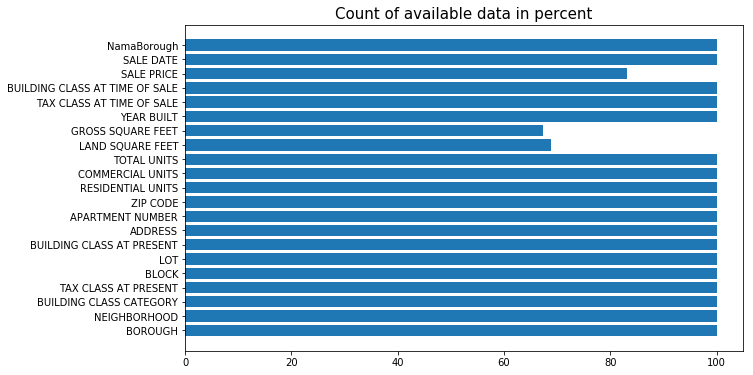

In [21]:
plot.figure(figsize=(10,6))
plot.barh(variables, count_pct)
plot.title('Count of available data in percent', fontsize=15)
plot.show()

Sale price datanya banyak yang hilang. Begitu pula data GSFeet dan LAnd Square Feet

In [23]:
#Menhilangkan missing data
Databersih = Databersih[Databersih['SALE PRICE'].notnull()]
len(Databersih)

69607

In [25]:
Databersih.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,69607.000000,4.844900e+04,4.790000e+04,69607.000000,69607.000000,6.960700e+04
mean,2.922996,4199.890140,374.580473,10741.159323,1.875070,0.164121,2.059319,3.544802e+03,3.528707e+03,1799.852184,1.640051,1.280703e+06
std,1.236549,3431.897518,656.232024,1264.804508,14.291398,8.997236,16.992716,3.973875e+04,2.920564e+04,520.099311,0.767824,1.143036e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1350.000000,22.000000,10306.000000,0.000000,0.000000,0.000000,1.425000e+03,8.160000e+02,1920.000000,1.000000,2.300000e+05
50%,3.000000,3378.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.150000e+03,1.620000e+03,1938.000000,2.000000,5.330000e+05
75%,4.000000,6192.000000,820.000000,11249.000000,2.000000,0.000000,2.000000,3.100000e+03,2.508000e+03,1965.000000,2.000000,9.500000e+05
max,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


2. Data Inspection
Karena ingin melihat jangkauan dari dependent variable PENJUALAN (SALE PRICE)

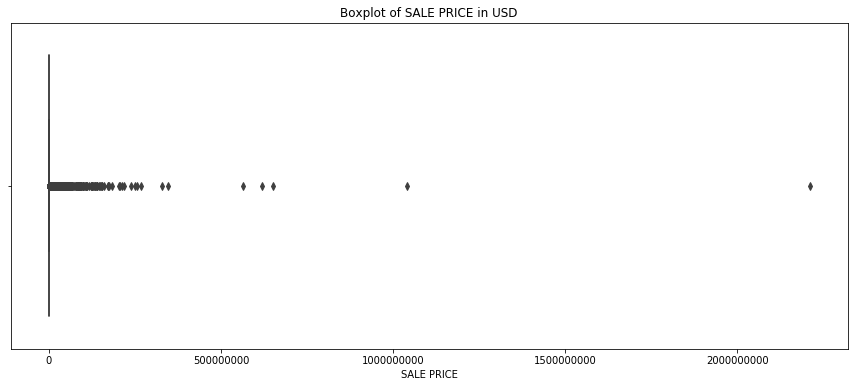

In [28]:
#Set the size of the plot
plot.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=Databersih)
plot.ticklabel_format(style='plain', axis='x')
plot.title('Boxplot of SALE PRICE in USD')
plot.show()

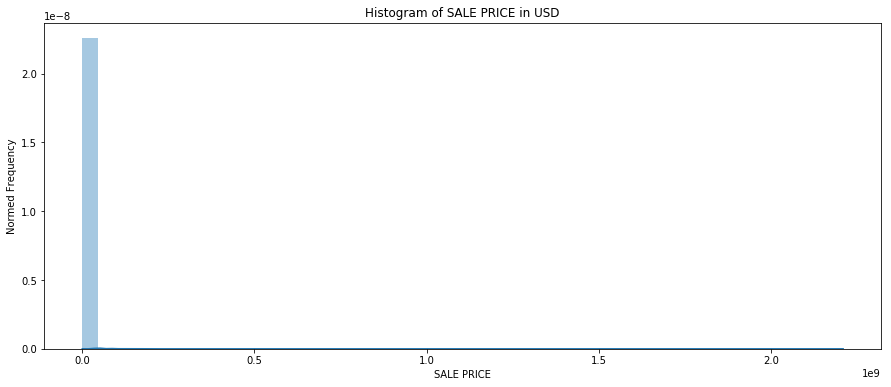

In [30]:
#Set the size of the plot
plot.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(Databersih['SALE PRICE'])
plot.title('Histogram of SALE PRICE in USD')
plot.ylabel('Normed Frequency')
plot.show()

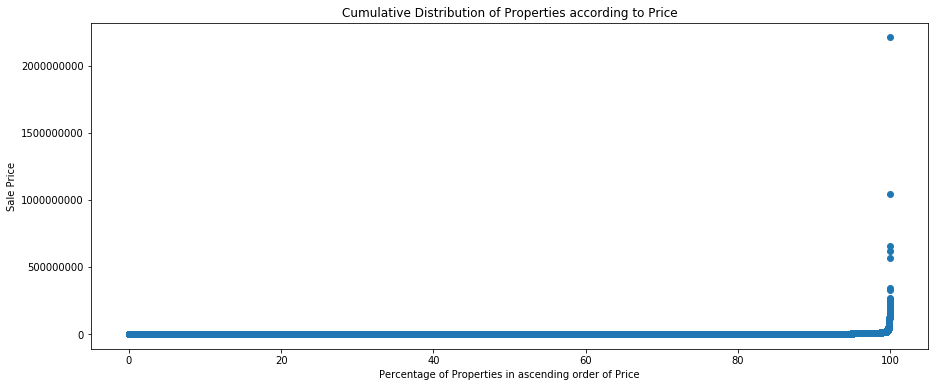

In [31]:
#Set the size of the plot
plot.figure(figsize=(15,6))

#Get the data and format it
x = Databersih[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data and configure the settings
plot.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], linestyle='None', marker='o')
plot.title('Cumulative Distribution of Properties according to Price')
plot.xlabel('Percentage of Properties in ascending order of Price')
plot.ylabel('Sale Price')
plot.ticklabel_format(style='plain', axis='y')
plot.show()

In [33]:
# Remove observations that fall outside those caps
Databersih = Databersih[(Databersih['SALE PRICE'] > 100000) & (Databersih['SALE PRICE'] < 5000000)]
len(Databersih)

54579

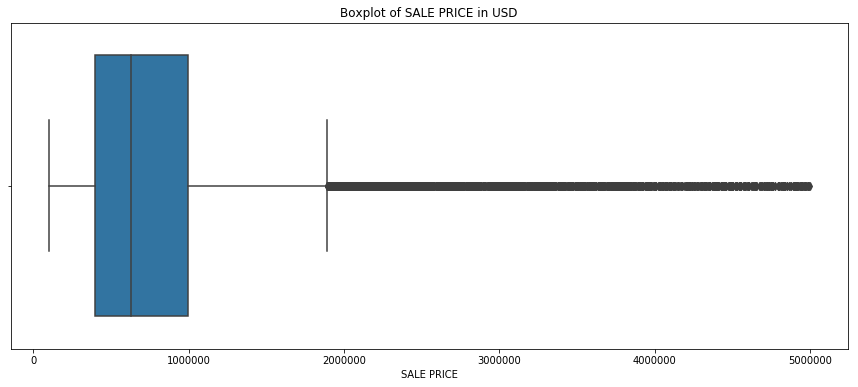

In [35]:
#Melihat plotting dari data
plot.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=Databersih)
plot.ticklabel_format(style='plain', axis='x')
plot.title('Boxplot of SALE PRICE in USD')
plot.show()

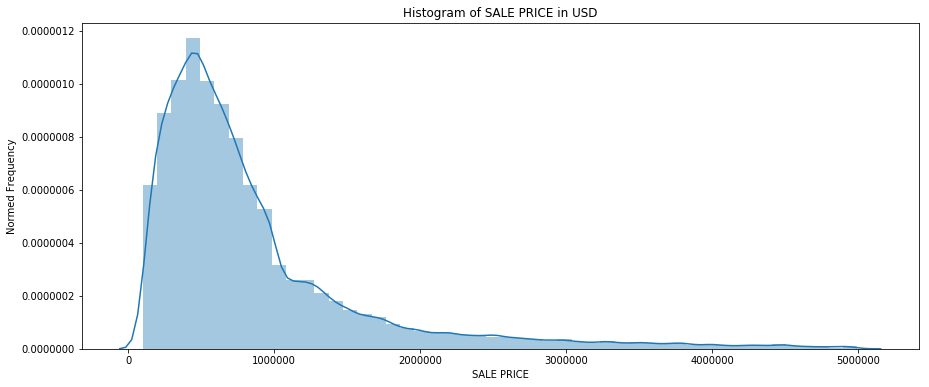

In [36]:
#Set the size of the plot
plot.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(Databersih['SALE PRICE'])
plot.title('Histogram of SALE PRICE in USD')
plot.ylabel('Normed Frequency')
plot.show()

In [38]:
Databersih.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NamaBorough
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,Manhattan
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,Manhattan
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,0,0,NaN,NaN,1920,2,C6,499000.0,2017-03-10,Manhattan
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,...,0,0,NaN,NaN,1920,2,C6,529500.0,2017-06-09,Manhattan
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",,10009,...,0,0,NaN,NaN,1920,2,C6,423000.0,2017-07-14,Manhattan


C:\Users\Novika Grasiaswaty\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


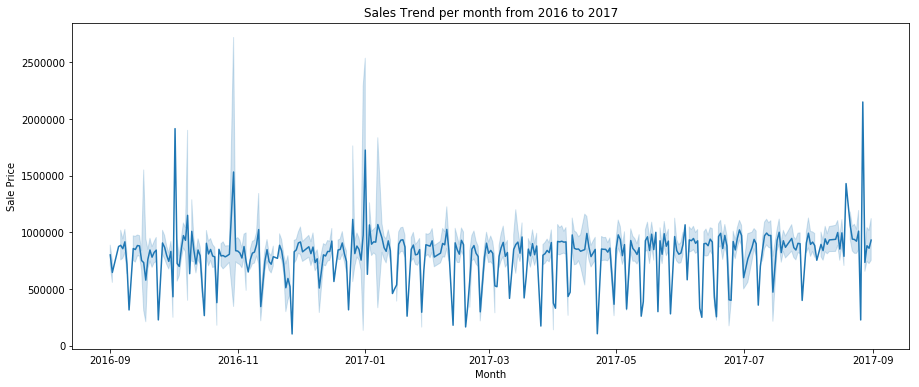

In [41]:
#Menngecek TRend 

plot.figure(figsize=(15,6))

sns.lineplot(x='SALE DATE',y='SALE PRICE',data=Databersih)
plot.title('Sales Trend per month from 2016 to 2017')
plot.ylabel('Sale Price')
plot.xlabel('Month')
plot.show();

Dari data terlihat jika ada yang terlupa, yaitu data terlalu banyak sehingga terlalu luas. Perlu dipersingkat sehingga datanya lebih pas. 

In [42]:
Databersih['sale_month']= Databersih['SALE DATE'].dt.month_name()
Databersih['sale_year']= Databersih['SALE DATE'].dt.year

In [43]:
#Cek data kembali 
Databersih.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,NamaBorough,sale_month,sale_year
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,Manhattan,September,2016
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,Manhattan,September,2016
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 1C",,10009,...,NaN,NaN,1920,2,C6,499000.0,2017-03-10,Manhattan,March,2017
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3RD STREET, 5A",,10009,...,NaN,NaN,1920,2,C6,529500.0,2017-06-09,Manhattan,June,2017
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,373,40,C6,"327 EAST 3 STREET, 2E",,10009,...,NaN,NaN,1920,2,C6,423000.0,2017-07-14,Manhattan,July,2017


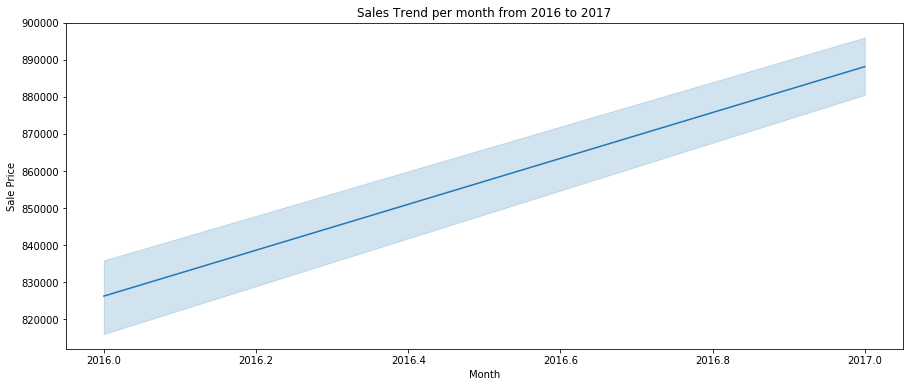

In [45]:
plot.figure(figsize=(15,6))

sns.lineplot(x='sale_year',y='SALE PRICE',data=Databersih)
plot.title('Sales Trend per month from 2016 to 2017')
plot.ylabel('Sale Price')
plot.xlabel('Month')
plot.show();

Dari Data Diatas dapat Disimpulkan JIKA TERJADI TREND KENAIKAN HARGA TIAP BULAN DARI TAHUN 2016 ke 2017. 
Kita juga bisa ulik untuk melihat pada BULAN apa saja, terjadi kenaikan harga rumah? 

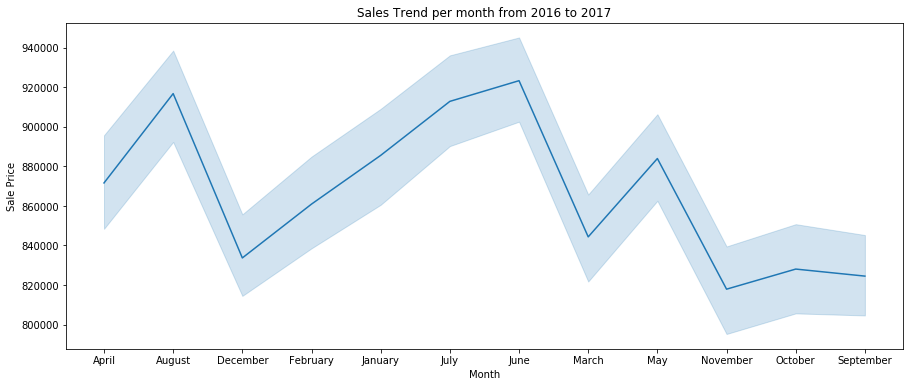

In [53]:
plot.figure(figsize=(15,6))

sns.lineplot(x='sale_month',y='SALE PRICE',data=Databersih)
plot.title('Sales Trend per month from 2016 to 2017')
plot.ylabel('Sale Price')
plot.xlabel('Month')
plot.show();

Dari hasil data di atasm terlihat jika rumah mengalami harga paling tinggi pada kisaran BULAN AGUSTUS dan JUNI, sementara harga rendah berada pada kisaran akhir tahun, yaitu SEPTEMBER, OCTOBER, NOVEMBER DAN DESEMBER

Sekarang, mari menuju pertanyaan ke dua.
2. 2. Bagaimana perbedaan harga untuk tiap Borough? 

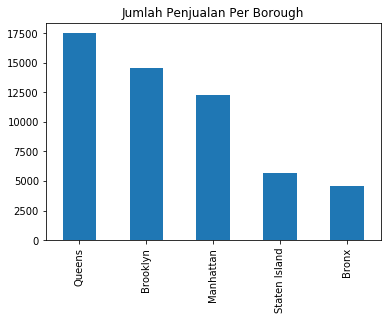

In [58]:
Databersih['NamaBorough'].value_counts().plot.bar()
plot.title("Jumlah Penjualan Per Borough");

Dari Data terlihat jika BOROUGH QUEENS memiliki data penjualan terbanyak. Mari kita eksplor lagi BOROUGH mana yang paling tinggi (jumlah penjualan berdasarkan harga). 

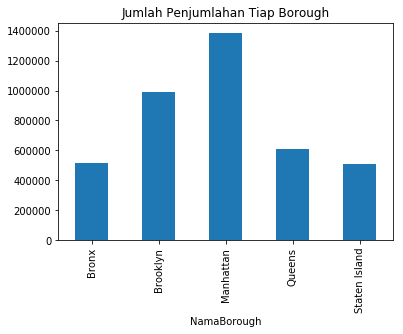

In [59]:
Databersih['SALE PRICE'].groupby(Databersih['NamaBorough']).mean().plot.bar()
plot.title("Jumlah Penjumlahan Tiap Borough");

Dari data tersaebut terlihat jika MANHATTAN adalah Borough dengan penghasilan terbanyak (bukan jumlah penjualan). Hal ini juga mengindikasikan jika harga properti di MANHATTAN lebih mahal bila dibandingkan dengan BOROUGH LAIN. 